In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap
from scipy.spatial import distance
import math
import warnings
warnings.filterwarnings("ignore")

In [48]:
pd.options.display.max_columns = 92
pd.options.display.max_rows = 100

In [49]:
transfers = pd.read_csv("C:\\Users\\soere\\Bachelorarbeit\\datasets\\transfers_dataset_merged.csv")

Explorative Analyse

In [8]:
def describe(df, stats):
    d = df.describe()
    return pd.concat([d, df.reindex(d.columns, axis = 1).agg(stats)])

describe(transfers, ['median'])

,Saison,Alter,Marktwert,Minuten,Tore,Vorlagen,Gelbe Karten,Rote Karten,Expected Goals,Expected Assists,Erfolgreiche Dribblings,Erfolgreiche Pässe,Potential,Größe,Gewicht,Beidfüßigkeit,Skill-Moves,Internationaler Ruf,Schnelligkeit,Schießen,Passen,Dribbling,Verteidigung,Physis,xGoalDiff,Vergangene Transfers
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,20.581715,24.849982,11.356212,1561.254854,3.164490,1.918108,3.285563,0.163431,2.989975,1.900353,35.816449,67.975644,79.372750,182.001059,75.800212,3.210025,2.967173,1.426403,72.359336,61.616308,66.002118,71.619132,57.060713,69.761384,0.064384,0.363925
std,1.757081,3.662262,13.645225,968.840336,4.592711,2.402844,2.812150,0.429052,3.895438,2.075261,35.302629,58.815117,4.423006,6.298400,6.880921,0.692992,0.722897,0.701820,10.514790,14.264203,9.101941,8.395293,18.249077,8.731896,1.470599,0.651973
min,18.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,163.000000,53.000000,1.000000,1.000000,1.000000,32.000000,15.000000,31.000000,31.000000,17.000000,35.000000,-6.200000,0.000000
25%,19.000000,22.000000,3.500000,730.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.400000,10.000000,21.000000,76.000000,178.000000,71.000000,3.000000,2.000000,1.000000,66.000000,53.000000,60.000000,68.000000,39.000000,65.000000,-0.600000,0.000000
50%,21.000000,25.000000,7.000000,1569.000000,1.000000,1.000000,3.000000,0.000000,1.600000,1.200000,25.000000,55.000000,79.000000,182.000000,75.000000,3.000000,3.000000,1.000000,73.000000,65.000000,67.000000,73.000000,65.000000,71.000000,-0.100000,0.000000
75%,22.000000,27.000000,14.000000,2368.000000,4.000000,3.000000,5.000000,0.000000,3.800000,2.700000,50.000000,100.000000,82.000000,186.000000,80.000000,4.000000,3.000000,2.000000,79.000000,73.000000,72.000000,77.000000,73.000000,76.000000,0.600000,1.000000
max,23.000000,38.000000,150.000000,4139.000000,35.000000,21.000000,17.000000,4.000000,33.200000,14.200000,276.000000,497.000000,95.000000,202.000000,100.000000,5.000000,5.000000,5.000000,96.000000,94.000000,91.000000,95.000000,89.000000,90.000000,8.600000,4.000000
median,21.000000,25.000000,7.000000,1569.000000,1.000000,1.000000,3.000000,0.000000,1.600000,1.200000,25.000000,55.000000,79.000000,182.000000,75.000000,3.000000,3.000000,1.000000,73.000000,65.000000,67.000000,73.000000,65.000000,71.000000,-0.100000,0.000000


Aufnehmende Liga
Serie A           735
Premier League    581
Ligue 1           519
Bundesliga        513
LaLiga            485
Name: count, dtype: int64


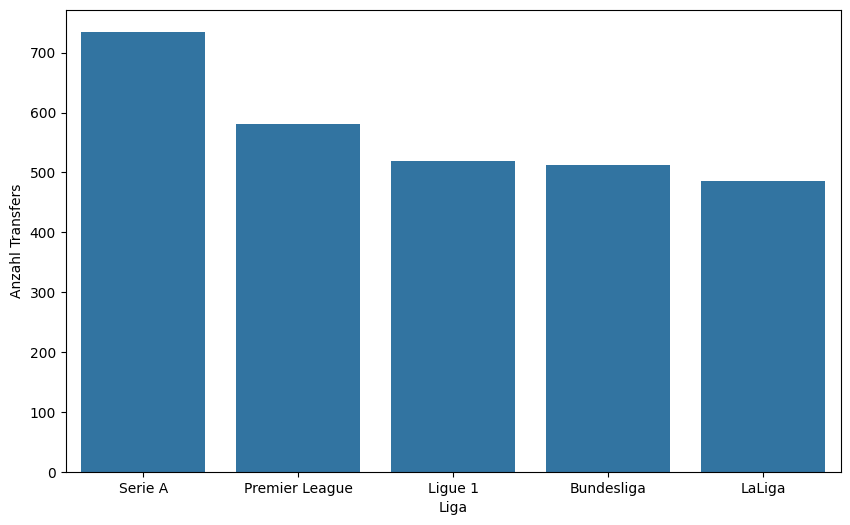

In [11]:
league_counts = transfers['Aufnehmende Liga'].value_counts()
print(league_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=league_counts.index, y=league_counts.values)
plt.xlabel('Liga')
plt.ylabel('Anzahl Transfers')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_ligen.png', bbox_inches='tight')
plt.show()

In [12]:
transfers.loc[transfers["Aufnehmender Verein"] == "Zamalek"]

,Saison,Spieler,Position,Alter,Marktwert,Nationalität,Abgebender Verein,Abgebende Liga,Aufnehmender Verein,Aufnehmende Liga,Minuten,Tore,Vorlagen,Gelbe Karten,Rote Karten,Expected Goals,Expected Assists,Erfolgreiche Dribblings,Erfolgreiche Pässe,Potential,Größe,Gewicht,Starker Fuß,Beidfüßigkeit,Skill-Moves,Internationaler Ruf,Arbeitsrate,Schnelligkeit,Schießen,Passen,Dribbling,Verteidigung,Physis,xGoalDiff,Vergangene Transfers


Aufnehmende Liga
Premier League    17.793287
LaLiga            11.408041
Bundesliga         9.610624
Serie A            9.339592
Ligue 1            8.683044
Name: Marktwert, dtype: float64


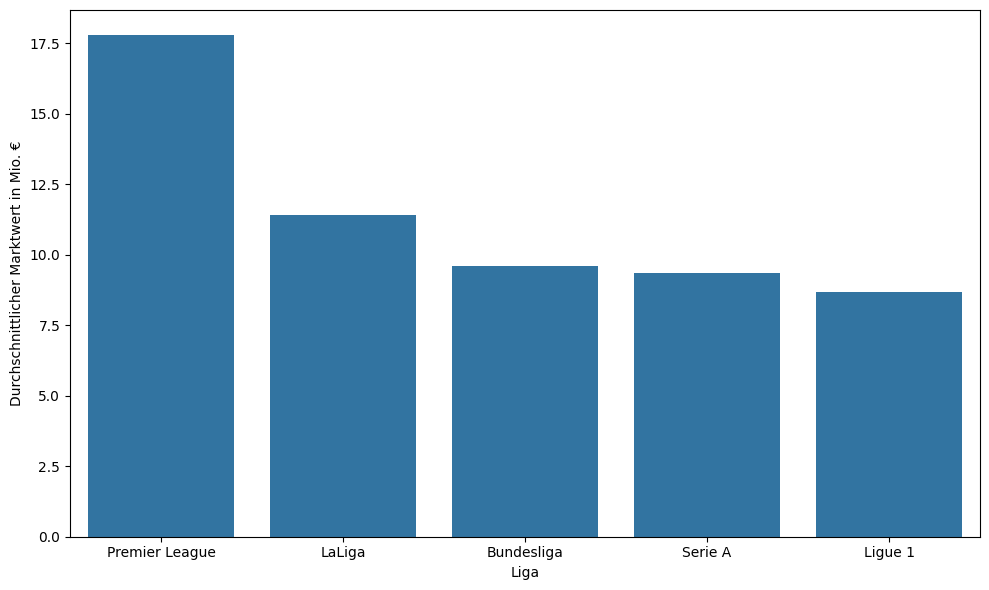

In [14]:
avg_marktwert = transfers.groupby('Aufnehmende Liga')["Marktwert"].mean().sort_values(ascending=False)
print(avg_marktwert)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_marktwert.index, y=avg_marktwert.values)
plt.xlabel('Liga')
plt.ylabel('Durchschnittlicher Marktwert in Mio. €')
plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\aufgenommene_spieler_marktwert_liga.png', bbox_inches='tight')
plt.show()

Aufnehmender Verein
Real Madrid      44.470588
Man City         39.775000
Chelsea          39.275862
Paris SG         38.439394
Man Utd          36.950000
Barcelona        34.680000
Bayern Munich    34.241379
Liverpool        32.077778
Juventus         27.200000
Tottenham        25.724138
Name: Marktwert, dtype: float64


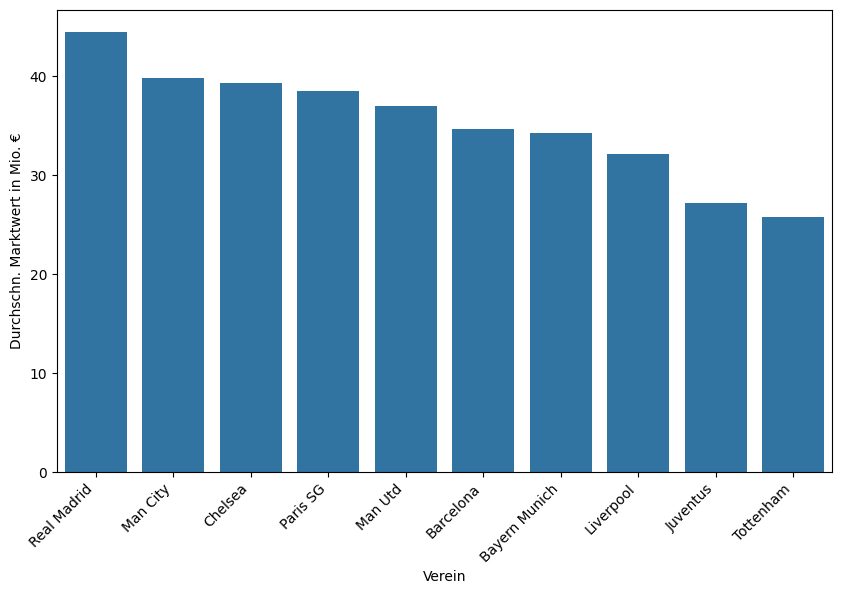

In [15]:
top_clubs = transfers.groupby('Aufnehmender Verein')['Marktwert'].mean().nlargest(10)
print(top_clubs)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Verein')
plt.ylabel('Durchschn. Marktwert in Mio. €')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_vereine_marktwert.png', bbox_inches='tight')
plt.show()

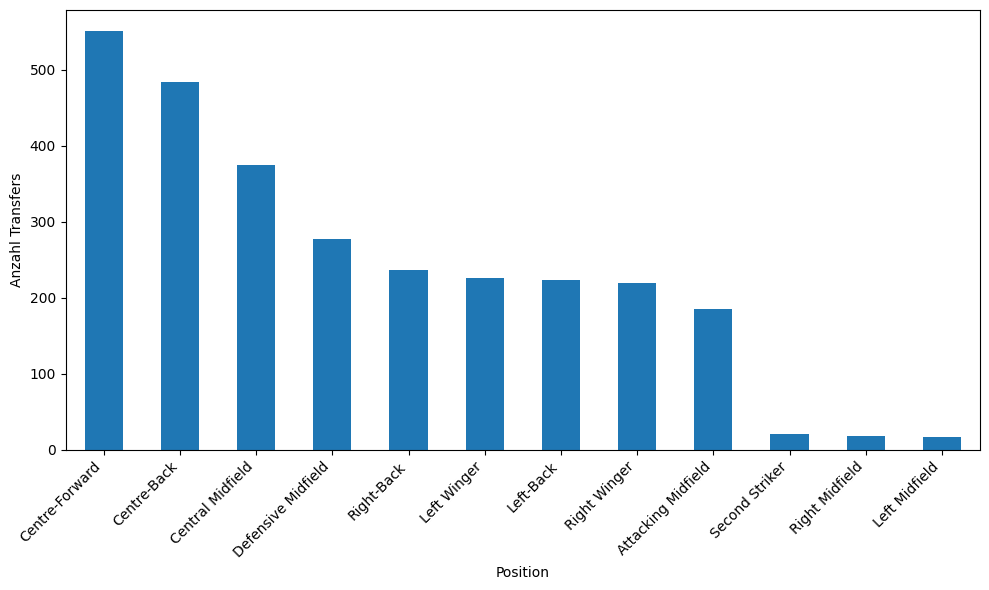

In [16]:
transfers_by_position = transfers.groupby('Position')['Position'].count()
transfers_by_position = transfers_by_position.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
transfers_by_position.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Anzahl Transfers')
plt.xticks(rotation=45, ha='right')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\häufigepositionen.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

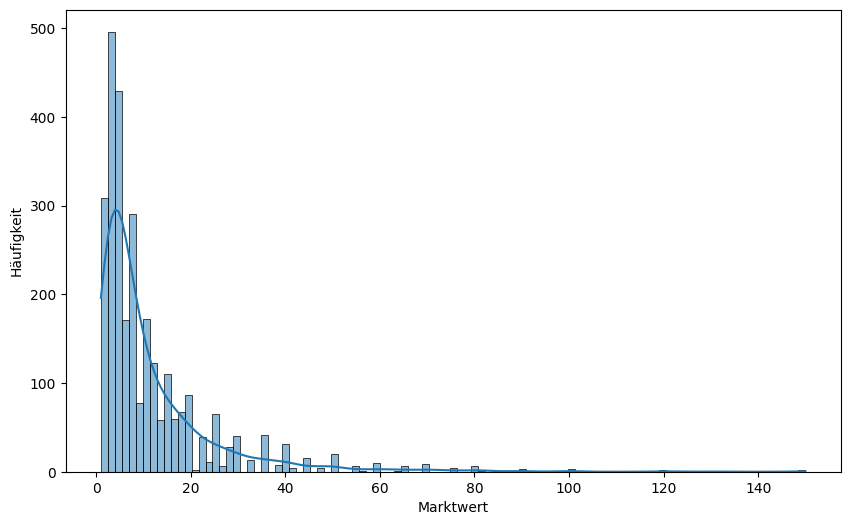

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(transfers['Marktwert'], kde=True)
plt.xlabel('Marktwert')
plt.ylabel('Häufigkeit')
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\verteilungmarktw.png', bbox_inches='tight')
plt.show()

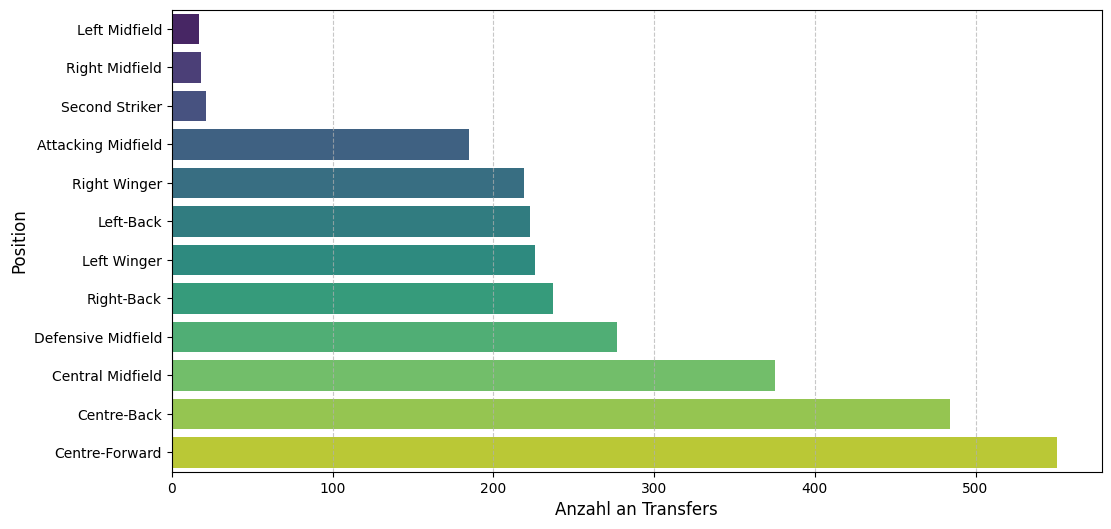

In [18]:
plt.figure(figsize=(12, 6))

position_counts = transfers['Position'].value_counts(ascending=True)
sns.countplot(y='Position', data=transfers, order=position_counts.index, palette='viridis')

plt.xlabel('Anzahl an Transfers', fontsize=12)
plt.ylabel('Position', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\häufigepositionen.png', bbox_inches='tight')
plt.show()

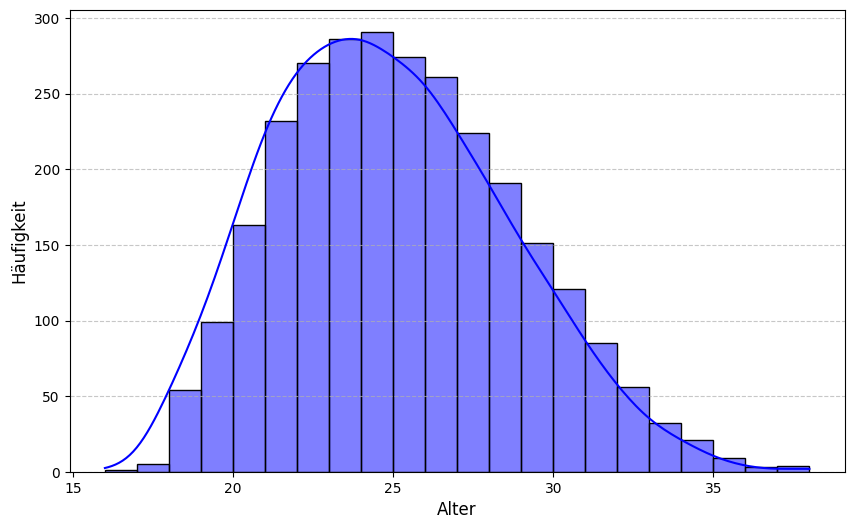

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(transfers['Alter'], kde=True, binwidth=1, color='blue')

plt.xlabel('Alter', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\alterverteilung.png', bbox_inches='tight')
plt.show()

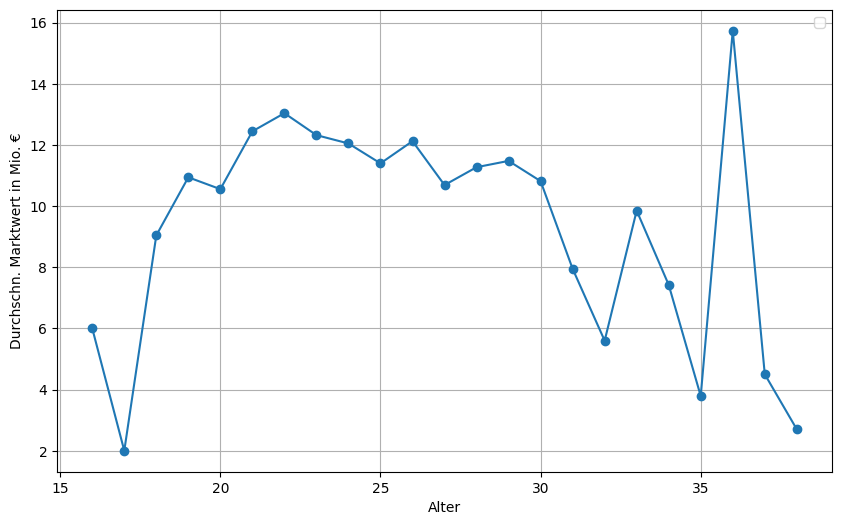

In [20]:
avg_fee_by_age = transfers.groupby('Alter')['Marktwert'].mean()
avg_fee_by_age = avg_fee_by_age.dropna()

z = np.polyfit(avg_fee_by_age.index, avg_fee_by_age.values, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(avg_fee_by_age.index, avg_fee_by_age.values, marker='o', linestyle='-')

plt.xlabel('Alter')
plt.ylabel('Durchschn. Marktwert in Mio. €')
plt.grid(True)
plt.legend()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\altervsmarktwert.png', bbox_inches='tight')
plt.show()

Aufnehmende Liga
LaLiga            26.169072
Serie A           25.066667
Ligue 1           24.373796
Premier League    24.345955
Bundesliga        24.345029
Name: Alter, dtype: float64


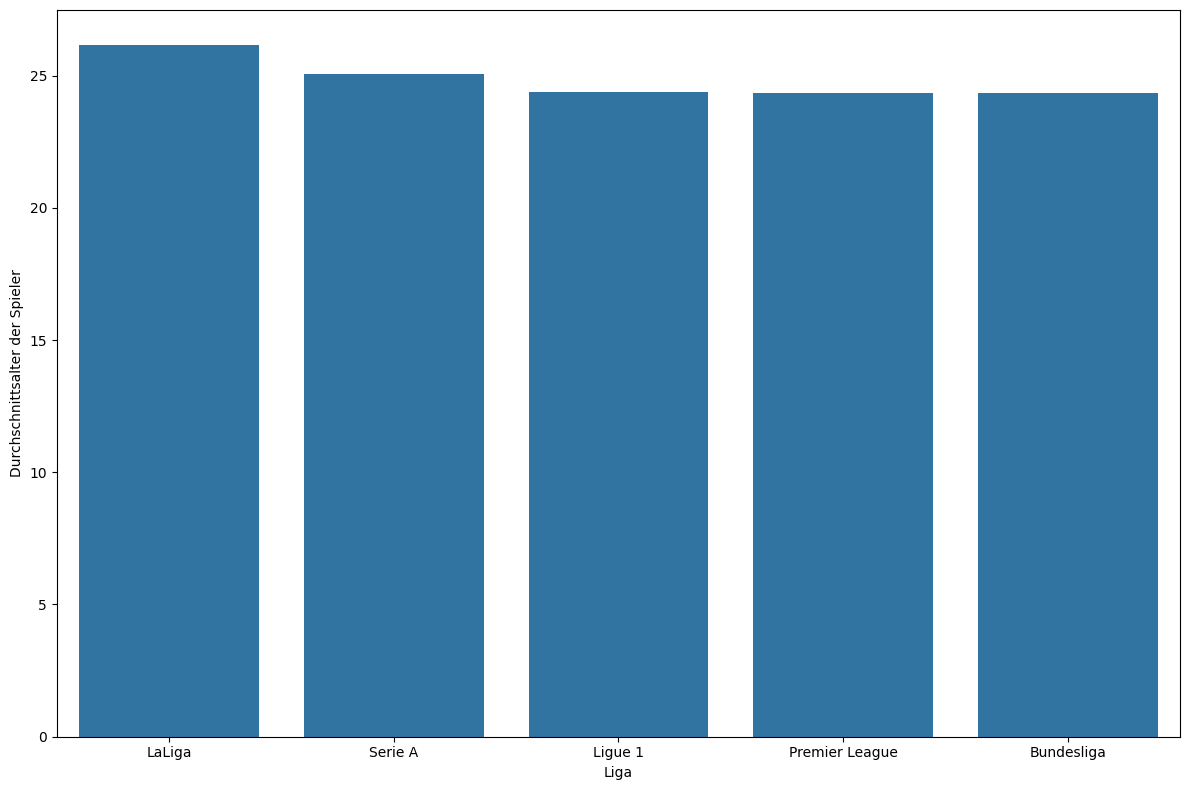

In [21]:
avg_age_by_league = transfers.groupby('Aufnehmende Liga')['Alter'].mean()
avg_age_by_league = avg_age_by_league.sort_values(ascending=False)
print(avg_age_by_league)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_age_by_league.index, y=avg_age_by_league.values)
plt.xlabel('Liga')
plt.ylabel('Durchschnittsalter der Spieler')
plt.tight_layout()

plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\alternachliga.png', bbox_inches='tight')
plt.show()

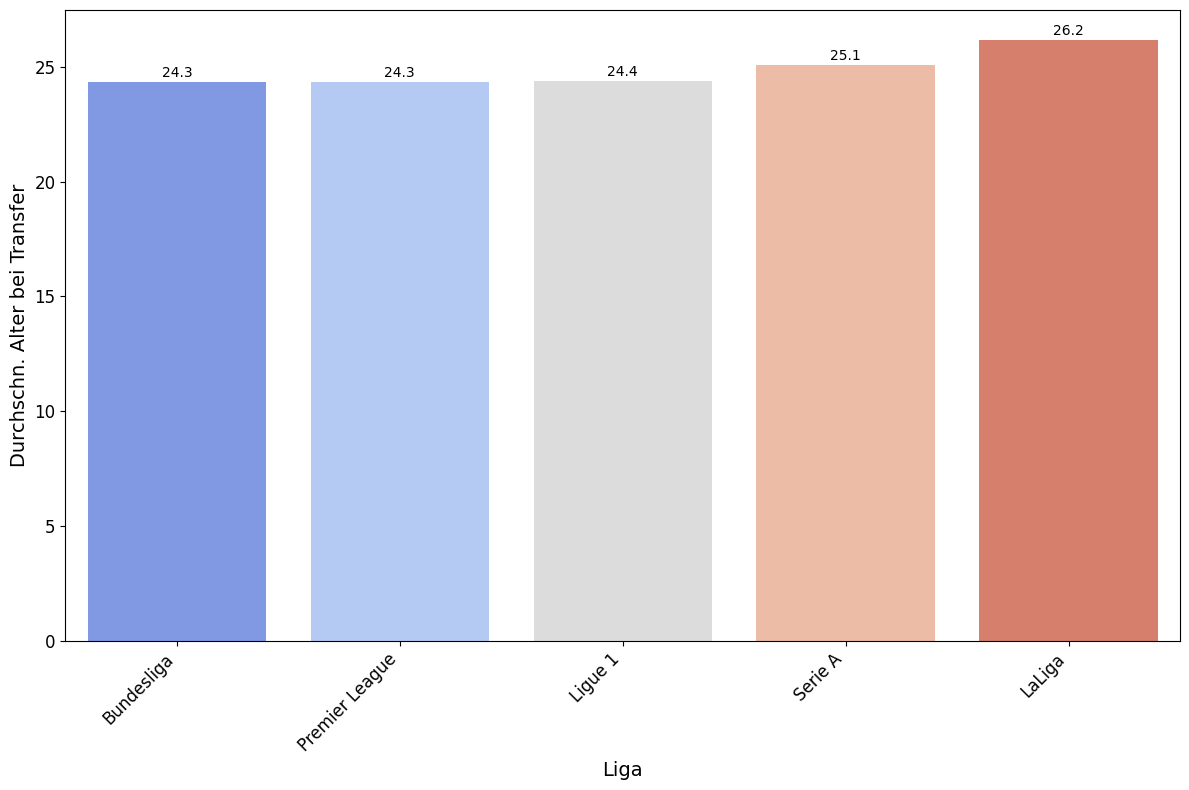

In [22]:
avg_age_by_league = transfers.groupby('Aufnehmende Liga')['Alter'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(avg_age_by_league))
sns.barplot(
    x=avg_age_by_league.index,
    y=avg_age_by_league.values,
    palette=colors
)
plt.xlabel('Liga', fontsize=14)
plt.ylabel('Durchschn. Alter bei Transfer', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(avg_age_by_league.values):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\alternachliga.png', bbox_inches='tight')
plt.show()

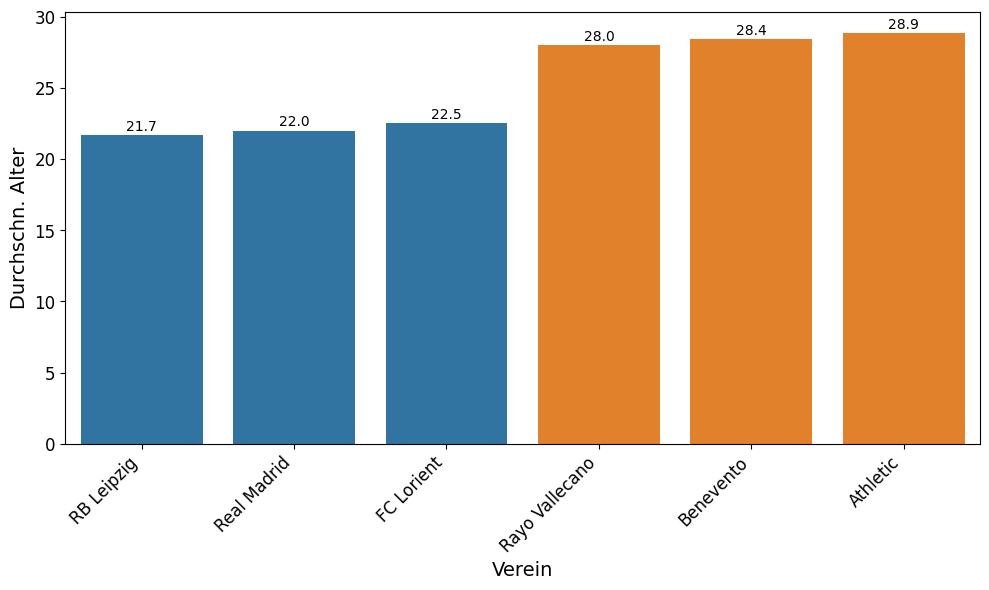

In [23]:
club_transfer_counts = transfers['Aufnehmender Verein'].value_counts()
clubs_with_min_transfers = club_transfer_counts[club_transfer_counts >= 5].index
filtered_transfers = transfers[transfers['Aufnehmender Verein'].isin(clubs_with_min_transfers)]

avg_age_by_club = (
    filtered_transfers.groupby('Aufnehmender Verein')['Alter'].mean().sort_values()
)

top_3_oldest = avg_age_by_club.tail(3)
top_3_youngest = avg_age_by_club.head(3)


top_and_bottom_clubs = pd.concat([top_3_youngest, top_3_oldest])

plt.figure(figsize=(10, 6))
colors = ['#1f77b4'] * 3 + ['#ff7f0e'] * 3 
sns.barplot(
    x=top_and_bottom_clubs.index,
    y=top_and_bottom_clubs.values,
    palette=colors
)

plt.xlabel('Verein', fontsize=14)
plt.ylabel('Durchschn. Alter', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(top_and_bottom_clubs.values):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_jung_alt_vereine_min_5.png', bbox_inches='tight')
plt.show()

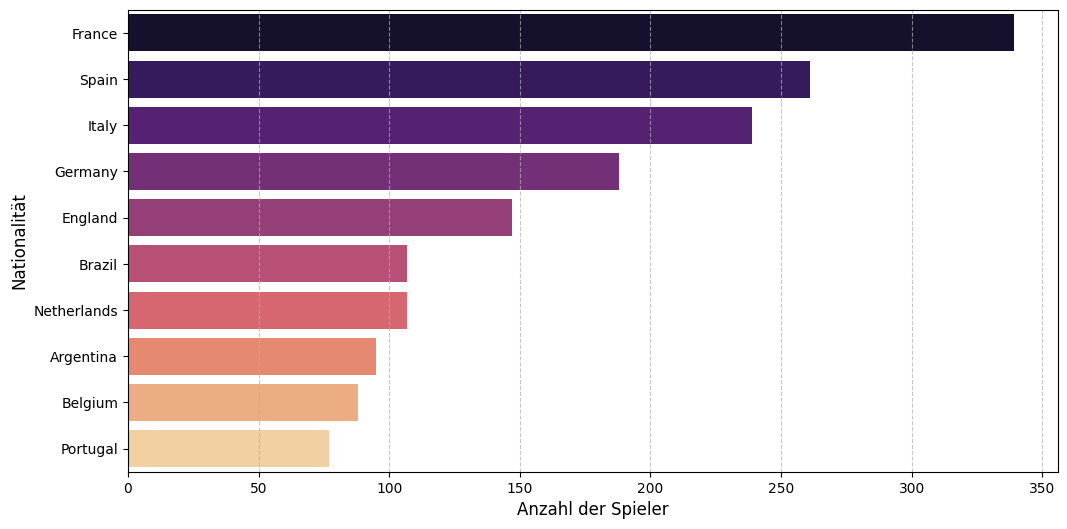

In [24]:
top_nationalities = transfers['Nationalität'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='magma')
plt.xlabel('Anzahl der Spieler', fontsize=12)
plt.ylabel('Nationalität', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top10natio.png', bbox_inches='tight')
plt.show()

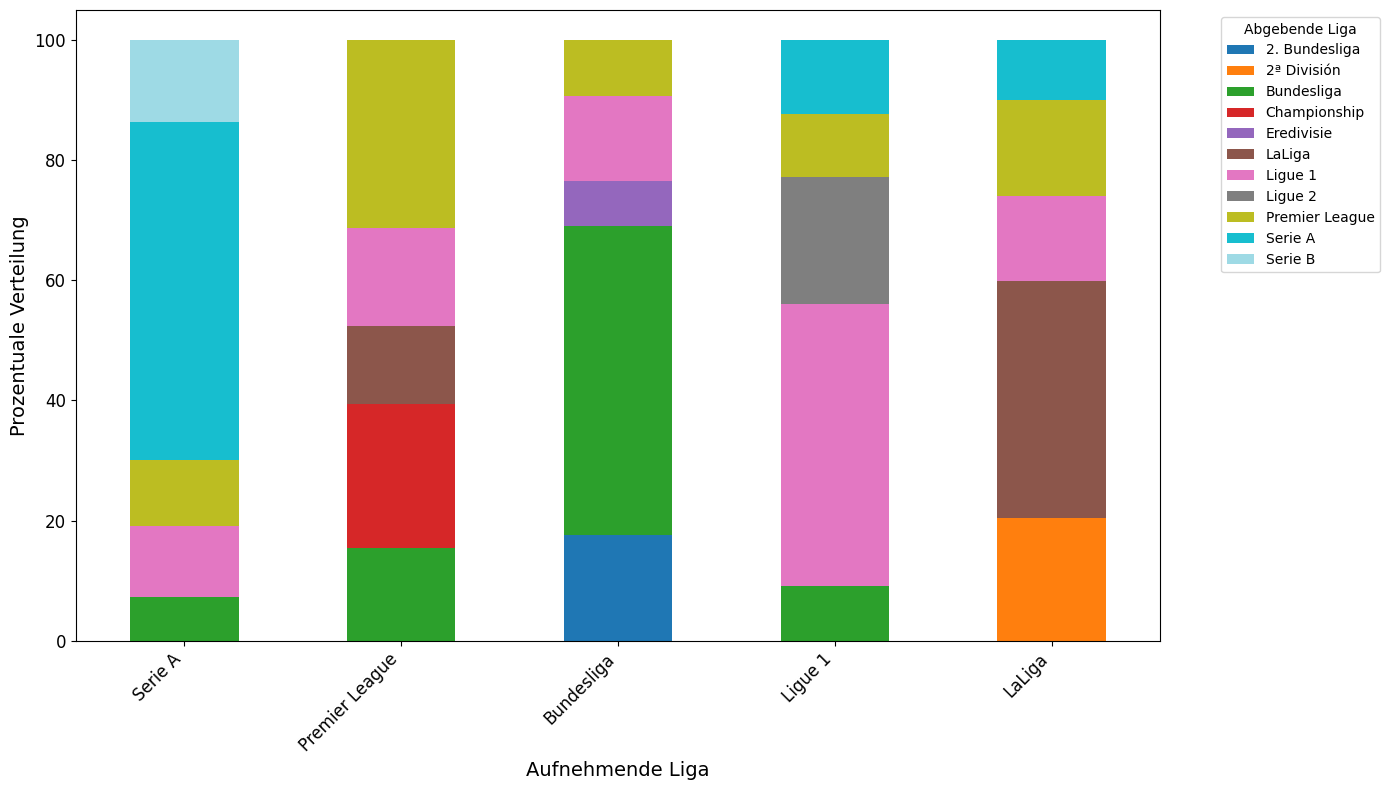

In [25]:
league_distribution = (
    transfers.groupby(['Aufnehmende Liga', 'Abgebende Liga'])['Abgebende Liga']
    .count()
    .rename('Count')
    .reset_index()
)

league_distribution['Rank'] = league_distribution.groupby('Aufnehmende Liga')['Count'].rank(method='first', ascending=False)
filtered_distribution = league_distribution[league_distribution['Rank'] <= 5]

pivot_table = filtered_distribution.pivot(
    index='Aufnehmende Liga', columns='Abgebende Liga', values='Count'
).fillna(0)


pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage = pivot_table_percentage.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

pivot_table_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)

plt.xlabel('Aufnehmende Liga', fontsize=14)
plt.ylabel('Prozentuale Verteilung', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Abgebende Liga', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_5_abgebende_ligen_prozent.png', bbox_inches='tight')
plt.show()

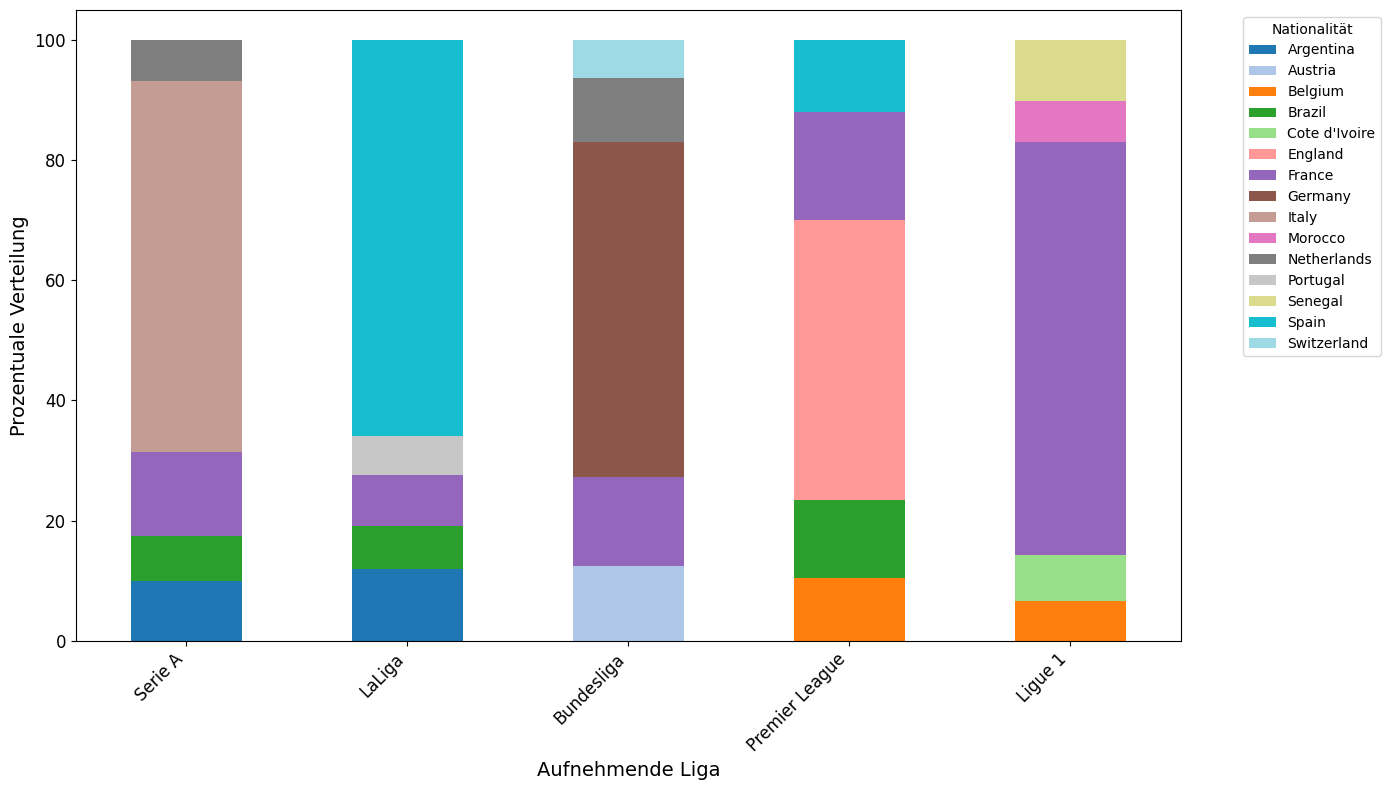

In [26]:
nationality_distribution = (
    transfers.groupby(['Aufnehmende Liga', 'Nationalität'])['Nationalität']
    .count()
    .rename('Count')
    .reset_index()
)

nationality_distribution['Rank'] = nationality_distribution.groupby('Aufnehmende Liga')['Count'].rank(method='first', ascending=False)
filtered_distribution = nationality_distribution[nationality_distribution['Rank'] <= 5]

pivot_table = filtered_distribution.pivot(
    index='Aufnehmende Liga', columns='Nationalität', values='Count'
).fillna(0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage = pivot_table_percentage.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

pivot_table_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)

plt.xlabel('Aufnehmende Liga', fontsize=14)
plt.ylabel('Prozentuale Verteilung', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Nationalität', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\top_5_nationalitaeten_prozent.png', bbox_inches='tight')
plt.show()

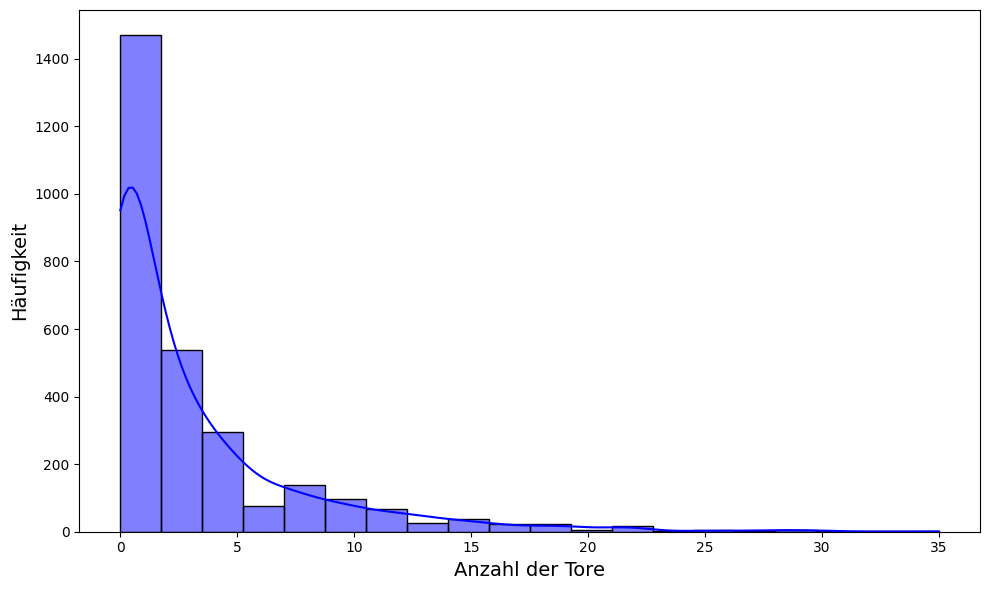

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(transfers['Tore'], bins=20, kde=True, color='blue')

plt.xlabel('Anzahl der Tore', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\tore_verteilung.png', bbox_inches='tight')
plt.show()

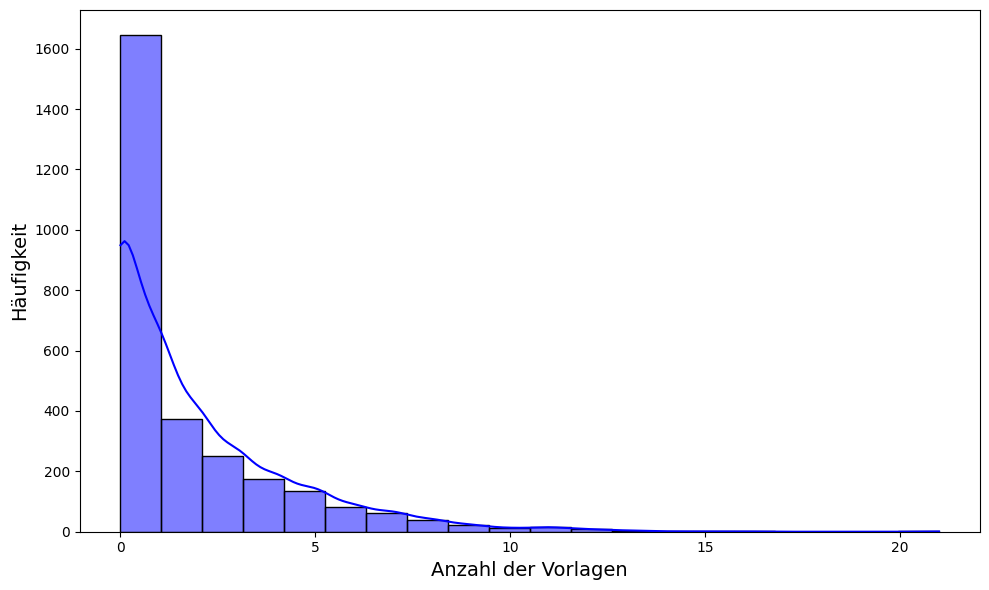

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(transfers['Vorlagen'], bins=20, kde=True, color='blue')

plt.xlabel('Anzahl der Vorlagen', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\vorlagen_verteilung.png', bbox_inches='tight')
plt.show()

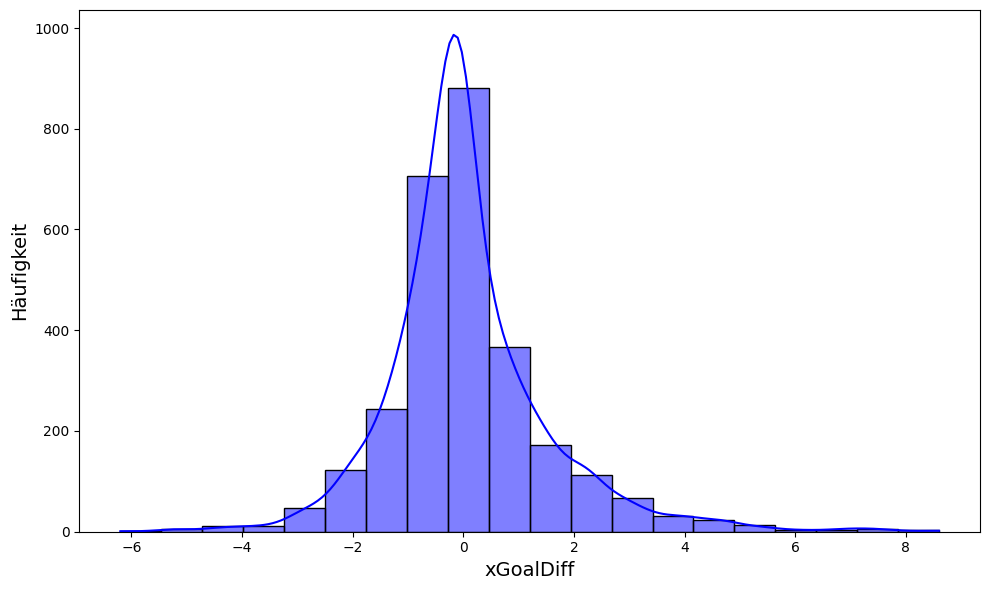

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(transfers['xGoalDiff'], bins=20, kde=True, color='blue')

plt.xlabel('xGoalDiff', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\xgoal_diff_verteilung.png', bbox_inches='tight')
plt.show()

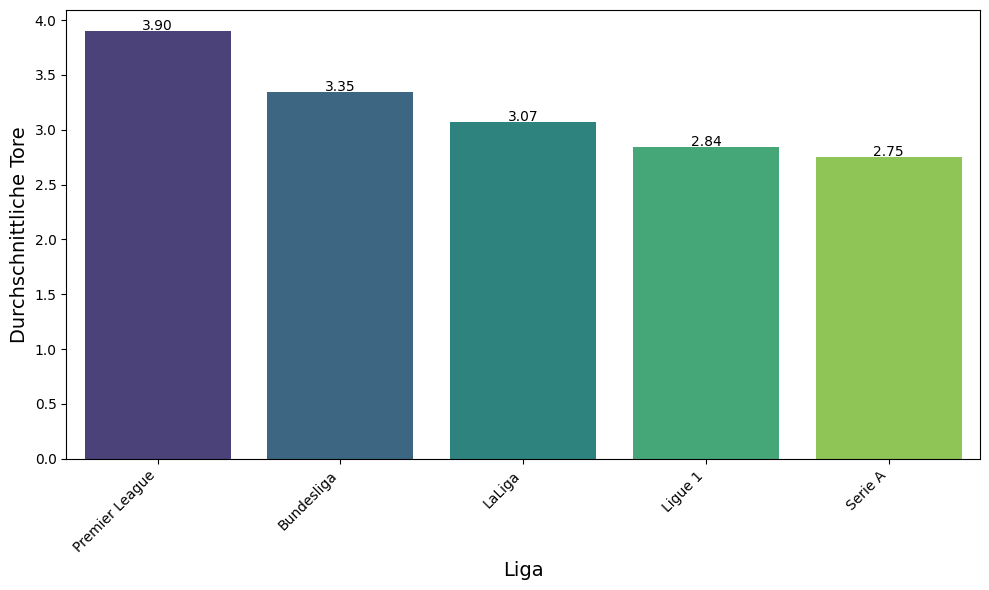

In [30]:
avg_goals_by_league = transfers.groupby('Aufnehmende Liga')['Tore'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_goals_by_league.index, y=avg_goals_by_league.values, palette='viridis')

plt.xlabel('Liga', fontsize=14)
plt.ylabel('Durchschnittliche Tore', fontsize=14)
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(avg_goals_by_league):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\tore_durchschnitt.png', bbox_inches='tight')
plt.show()


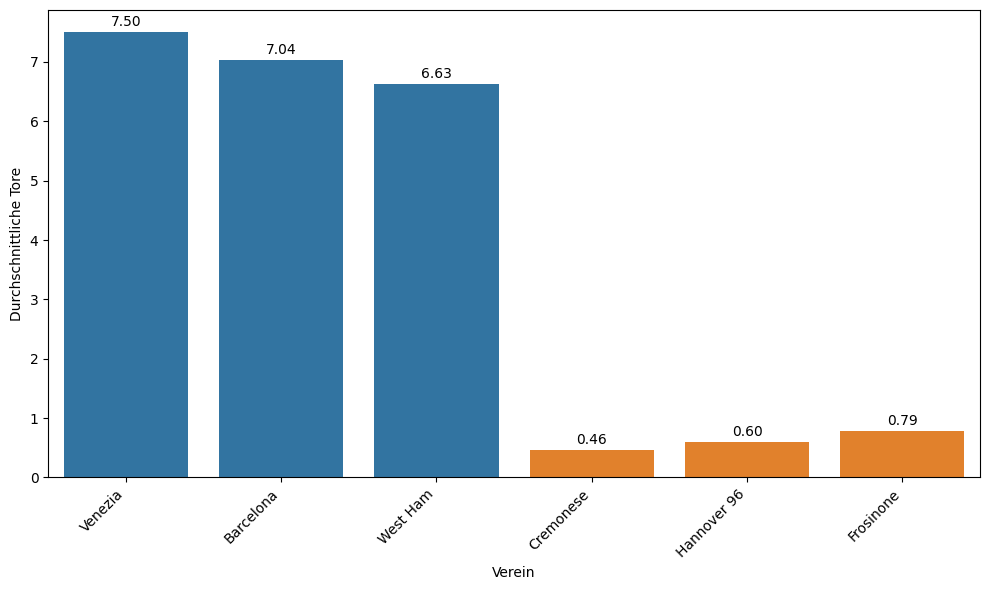

In [31]:
avg_goals_clubs = transfers.groupby("Aufnehmender Verein")["Tore"].mean(numeric_only=True)
club_transfer_counts = transfers["Aufnehmender Verein"].value_counts()

valid_clubs = club_transfer_counts[club_transfer_counts >= 5].index
avg_goals_clubs = avg_goals_clubs[avg_goals_clubs.index.isin(valid_clubs)]

top_3_clubs = avg_goals_clubs.nlargest(3)
bottom_3_clubs = avg_goals_clubs.nsmallest(3)

combined_clubs = pd.concat([top_3_clubs, bottom_3_clubs])

colors = ['#1f77b4'] * 3 + ['#ff7f0e'] * 3

plt.figure(figsize=(10, 6))
sns.barplot(x=combined_clubs.index, y=combined_clubs.values, palette=colors)
plt.xlabel("Verein")
plt.ylabel("Durchschnittliche Tore")
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(combined_clubs.values):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()

plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\tore_durchschnitt_clubs.png', bbox_inches='tight')
plt.show()

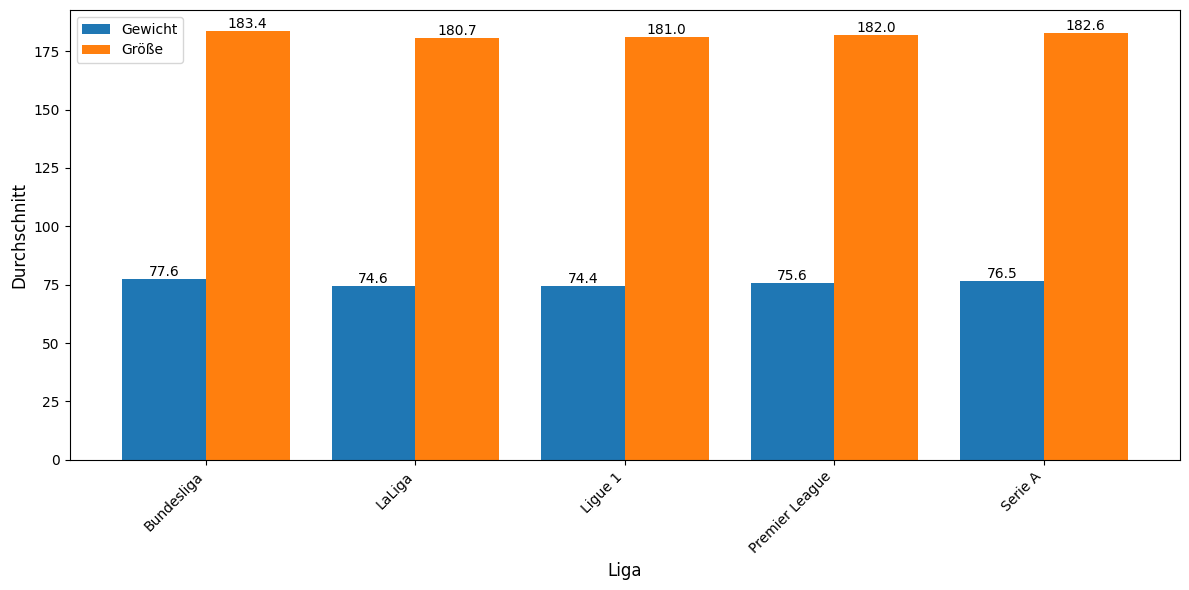

In [32]:
avg_weight_height_by_league = transfers.groupby('Aufnehmende Liga')[['Gewicht', 'Größe']].mean()

fig, ax = plt.subplots(figsize=(12, 6))
avg_weight_height_by_league.plot(kind='bar', ax=ax, width=0.8)

plt.xlabel('Liga', fontsize=12)
plt.ylabel('Durchschnitt', fontsize=12)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\größe_gewicht.png', bbox_inches='tight')
plt.show()

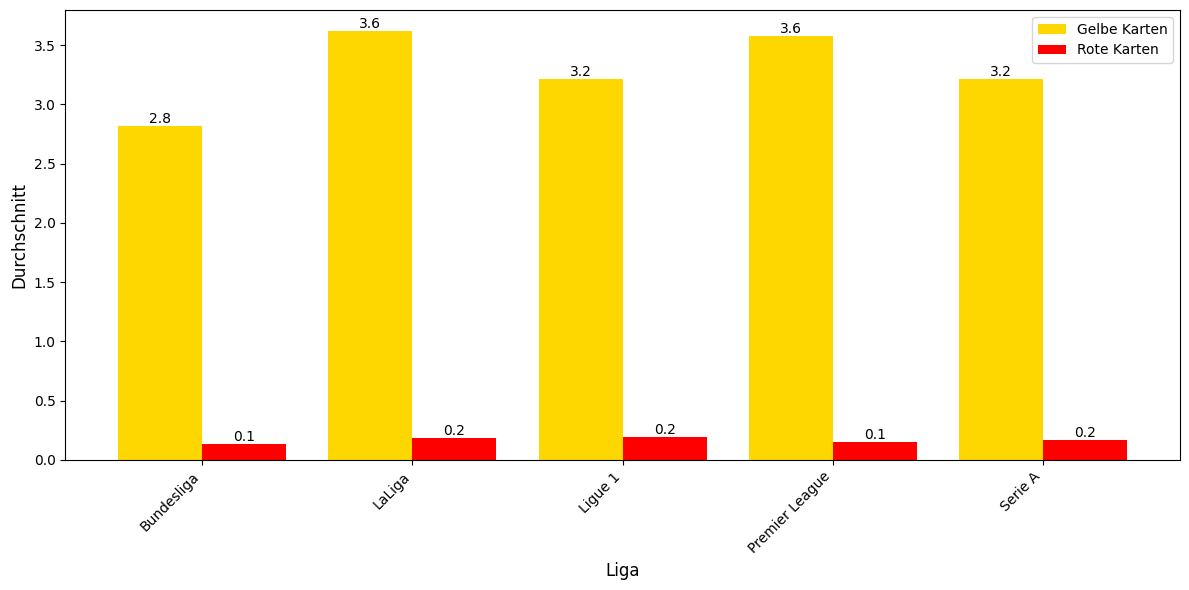

In [33]:
avg_cards_by_league = transfers.groupby('Aufnehmende Liga')[['Gelbe Karten', 'Rote Karten']].mean()

fig, ax = plt.subplots(figsize=(12, 6))
avg_cards_by_league.plot(kind='bar', ax=ax, width=0.8, color=['gold', 'red'])

plt.xlabel('Liga', fontsize=12)
plt.ylabel('Durchschnitt', fontsize=12)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.savefig('C:\\Users\\soere\\Bachelorarbeit\\figs\\gelbe_rote.png', bbox_inches='tight')
plt.show()

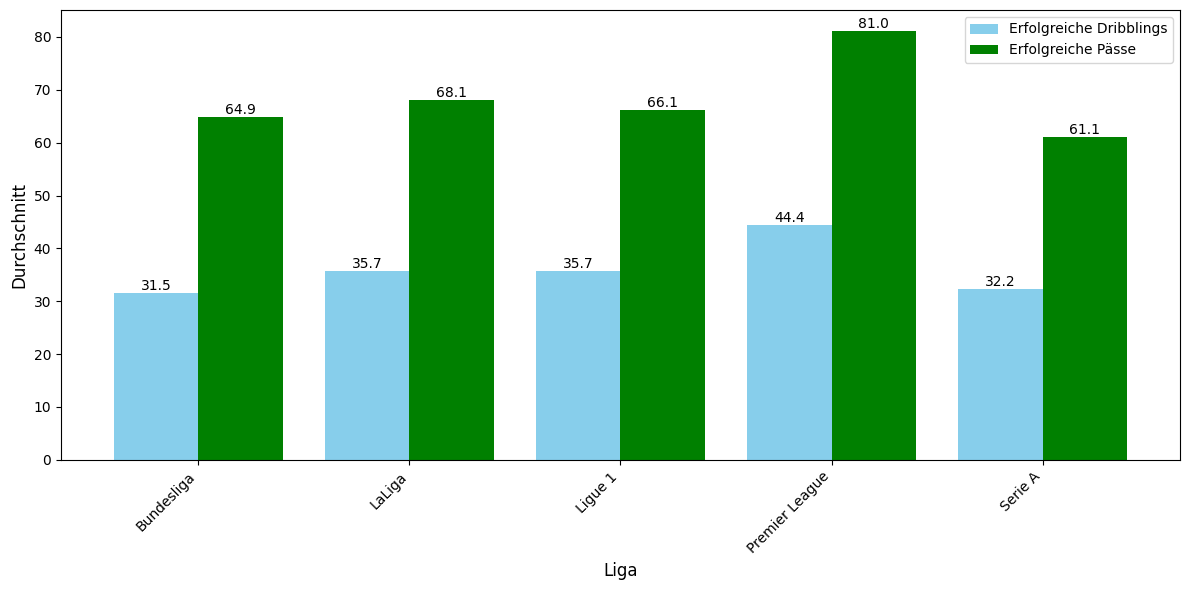

In [34]:
avg_dribbles_passes_by_league = transfers.groupby('Aufnehmende Liga')[['Erfolgreiche Dribblings', 'Erfolgreiche Pässe']].mean()

fig, ax = plt.subplots(figsize=(12, 6))
avg_dribbles_passes_by_league.plot(kind='bar', ax=ax, width=0.8, color=['skyblue', 'green'])

plt.xlabel('Liga', fontsize=12)
plt.ylabel('Durchschnitt', fontsize=12)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.savefig('average_dribbles_passes_by_league.png', bbox_inches='tight')
plt.show()

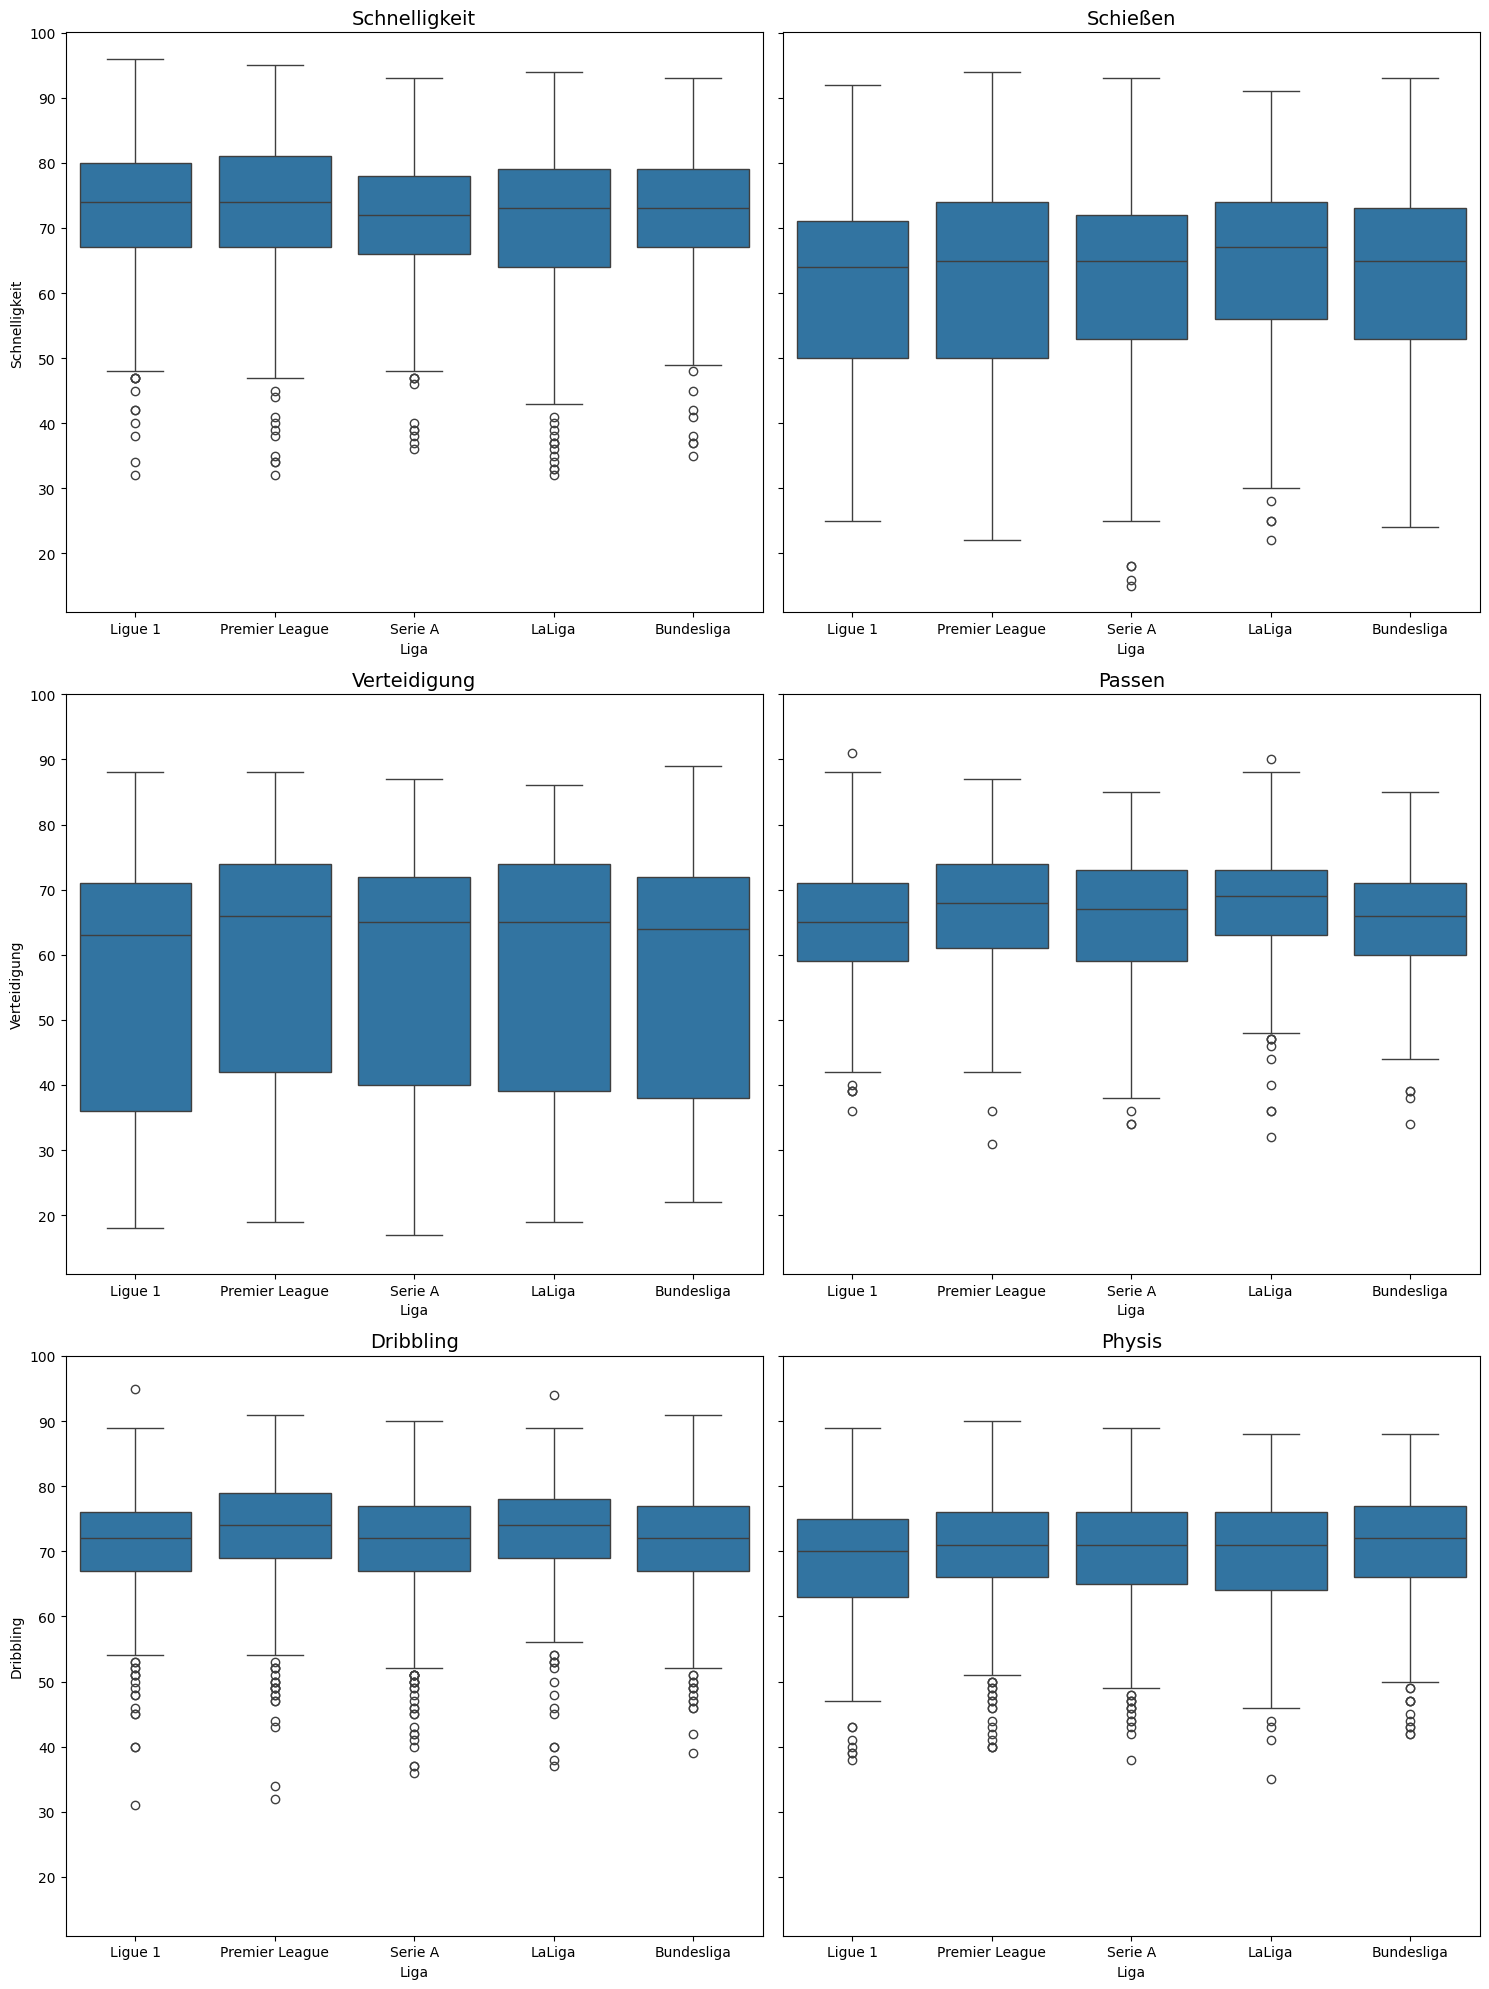

In [35]:
attributes = ['Schnelligkeit', 'Schießen', 'Verteidigung', 'Passen', 'Dribbling', 'Physis']

fig, axes = plt.subplots(len(attributes) // 2, 2, figsize=(15, 20), sharey=True)
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    sns.boxplot(data=transfers, x='Aufnehmende Liga', y=attribute, ax=axes[i])
    axes[i].set_title(f'{attribute}', fontsize=14)
    axes[i].set_xlabel('Liga')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.savefig('player_characteristics_by_league.png', bbox_inches='tight')
plt.show()


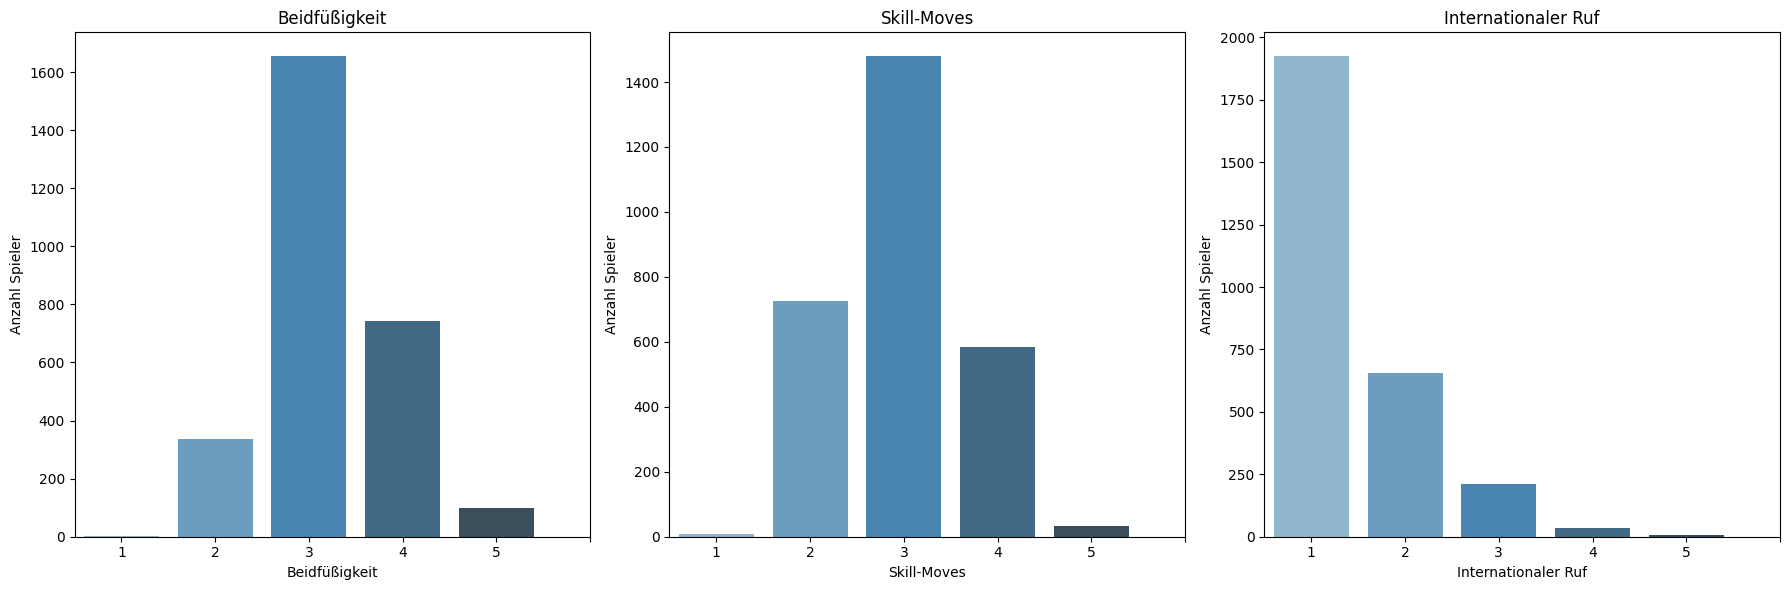

In [36]:
columns_to_plot = ['Beidfüßigkeit', 'Skill-Moves', 'Internationaler Ruf']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, column in zip(axes, columns_to_plot):
    counts = transfers[column].value_counts().sort_index()  # Count occurrences and sort by index (0-5)
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Blues_d")
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Anzahl Spieler')
    ax.set_xticks(range(0, 6))  # Ensure ticks show 0-5


# Adjust layout
plt.tight_layout()
plt.savefig('stars_verteilung.png', bbox_inches='tight')
plt.show()

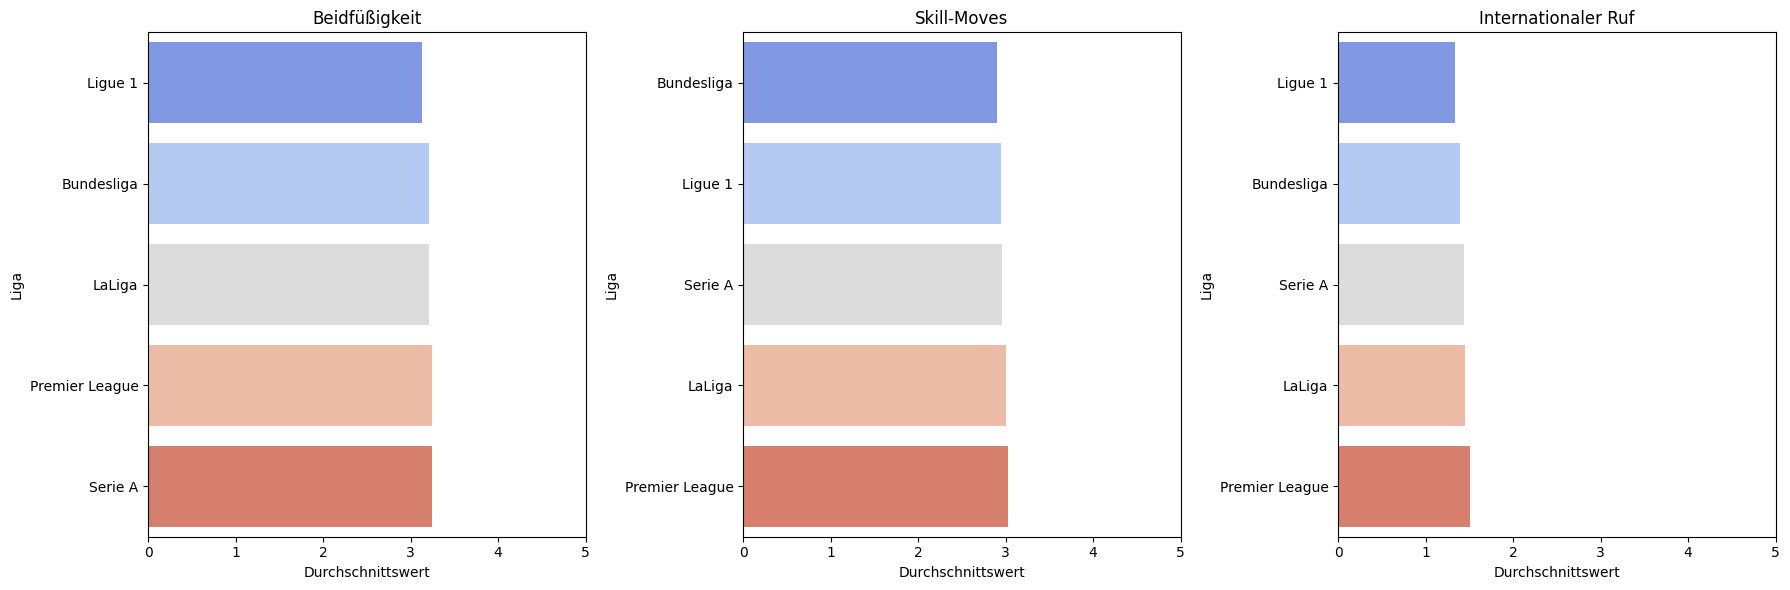

In [37]:
attributes = ['Beidfüßigkeit', 'Skill-Moves', 'Internationaler Ruf']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


for ax, attribute in zip(axes, attributes):
    league_means = transfers.groupby('Aufnehmende Liga')[attribute].mean().sort_values()
    sns.barplot(x=league_means.values, y=league_means.index, ax=ax, palette="coolwarm")
    ax.set_title(f'{attribute}')
    ax.set_xlabel('Durchschnittswert')
    ax.set_ylabel('Liga')
    ax.set_xlim(0, 5)  

plt.tight_layout()
plt.savefig('stars_durchschn.png', bbox_inches='tight')
plt.show()

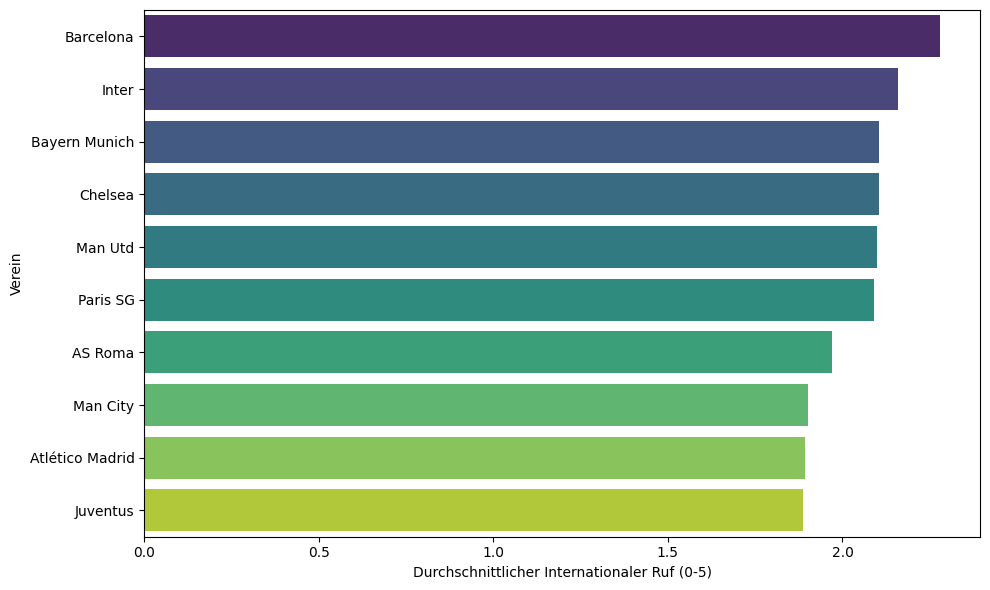

In [38]:

vereine_mit_genug_transfers = (
    transfers.groupby('Aufnehmender Verein')
    .filter(lambda x: len(x) > 5)
)


top_clubs_ruf = (
    vereine_mit_genug_transfers.groupby('Aufnehmender Verein')['Internationaler Ruf']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs_ruf.values, y=top_clubs_ruf.index, palette="viridis")
plt.xlabel('Durchschnittlicher Internationaler Ruf (0-5)')
plt.ylabel('Verein')
plt.tight_layout()
plt.savefig('international_rep_top10_clubs.png', bbox_inches='tight')
plt.show()

In [39]:
transfers[transfers["Aufnehmender Verein"] == "Benevento"]

,Saison,Spieler,Position,Alter,Marktwert,Nationalität,Abgebender Verein,Abgebende Liga,Aufnehmender Verein,Aufnehmende Liga,Minuten,Tore,Vorlagen,Gelbe Karten,Rote Karten,Expected Goals,Expected Assists,Erfolgreiche Dribblings,Erfolgreiche Pässe,Potential,Größe,Gewicht,Starker Fuß,Beidfüßigkeit,Skill-Moves,Internationaler Ruf,Arbeitsrate,Schnelligkeit,Schießen,Passen,Dribbling,Verteidigung,Physis,xGoalDiff,Vergangene Transfers
1168,20,Gianluca Caprari,Second Striker,27,6.5,Italy,Sampdoria,Serie A,Benevento,Serie A,667.0,3.0,0.0,4.0,1.0,1.2,0.5,21.0,29.0,75,176,72,Right,3,3,2,Medium/Low,84.0,68.0,70.0,81.0,20.0,49.0,1.8,1
1182,20,Iago Falque,Right Winger,30,6.0,Spain,Torino,Serie A,Benevento,Serie A,102.0,0.0,0.0,0.0,0.0,0.1,0.1,2.0,6.0,77,174,69,Left,3,4,3,High/Low,72.0,73.0,78.0,81.0,41.0,52.0,-0.1,1
1257,20,Fabio Depaoli,Right-Back,23,4.0,Italy,Sampdoria,Serie A,Benevento,Serie A,1854.0,0.0,1.0,7.0,0.0,1.1,2.7,37.0,66.0,80,182,71,Right,3,3,1,Medium/Medium,72.0,53.0,70.0,72.0,67.0,55.0,-1.1,1
1269,20,Kamil Glik,Centre-Back,32,3.5,Poland,Monaco,Ligue 1,Benevento,Serie A,2070.0,1.0,0.0,5.0,0.0,2.2,0.1,6.0,36.0,75,190,80,Right,2,2,3,Low/High,36.0,32.0,45.0,51.0,74.0,79.0,-1.2,0
1304,20,Artur Ioniță,Central Midfield,30,2.5,Moldova,Cagliari Calcio,Serie A,Benevento,Serie A,1897.0,0.0,2.0,6.0,0.0,1.3,1.0,32.0,53.0,73,184,73,Right,4,3,2,Medium/High,61.0,68.0,71.0,70.0,74.0,76.0,-1.3,0


In [40]:
transfers

,Saison,Spieler,Position,Alter,Marktwert,Nationalität,Abgebender Verein,Abgebende Liga,Aufnehmender Verein,Aufnehmende Liga,Minuten,Tore,Vorlagen,Gelbe Karten,Rote Karten,Expected Goals,Expected Assists,Erfolgreiche Dribblings,Erfolgreiche Pässe,Potential,Größe,Gewicht,Starker Fuß,Beidfüßigkeit,Skill-Moves,Internationaler Ruf,Arbeitsrate,Schnelligkeit,Schießen,Passen,Dribbling,Verteidigung,Physis,xGoalDiff,Vergangene Transfers
0,18,Kylian Mbappé,Centre-Forward,19,120.0,France,Monaco,Ligue 1,Paris SG,Ligue 1,74.0,0.0,0.0,0.0,0.0,0.2,0.0,6.0,3.0,95,178,73,Right,4,5,3,High/Medium,96.0,81.0,79.0,89.0,39.0,72.0,-0.2,0
1,18,Riyad Mahrez,Right Winger,27,50.0,Algeria,Leicester,Premier League,Man City,Premier League,2950.0,12.0,10.0,2.0,0.0,6.5,7.2,121.0,190.0,85,179,67,Left,4,5,3,Medium/Medium,85.0,79.0,81.0,90.0,37.0,59.0,5.5,0
2,18,Gonzalo Higuaín,Centre-Forward,30,55.0,Argentina,Juventus,Serie A,AC Milan,Serie A,2815.0,16.0,5.0,4.0,0.0,11.8,3.4,68.0,62.0,88,186,89,Right,4,3,4,High/Medium,73.0,87.0,70.0,83.0,31.0,74.0,4.2,0
3,18,Gonzalo Higuaín,Centre-Forward,31,50.0,Argentina,Juventus,Serie A,Chelsea,Premier League,2815.0,16.0,5.0,4.0,0.0,11.8,3.4,68.0,62.0,88,186,89,Right,4,3,4,High/Medium,73.0,87.0,70.0,83.0,31.0,74.0,4.2,0
4,18,Fabinho,Defensive Midfield,24,45.0,Brazil,Monaco,Ligue 1,Liverpool,Premier League,3060.0,7.0,3.0,8.0,0.0,5.8,4.2,64.0,261.0,89,188,78,Right,2,3,3,Medium/Medium,71.0,69.0,78.0,77.0,84.0,84.0,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,23,Tomas Suslov,Attacking Midfield,21,2.0,Slovakia,FC Groningen,Keuken Kampioen Divisie,Hellas Verona,Serie A,2123.0,1.0,1.0,6.0,0.0,2.3,2.7,42.0,77.0,76,173,72,Left,3,3,1,Medium/Medium,71.0,66.0,67.0,72.0,51.0,66.0,-1.3,0
2856,23,Sergi Guardiola,Centre-Forward,32,2.0,Spain,Real Valladolid,2ª División,Cádiz CF,LaLiga,502.0,0.0,0.0,1.0,0.0,1.0,0.1,7.0,3.0,72,184,78,Left,2,3,1,High/Low,70.0,72.0,62.0,72.0,30.0,75.0,-1.0,3
2857,23,Maximilian Mittelstädt,Left-Back,26,2.0,Germany,Hertha BSC,2. Bundesliga,VfB Stuttgart,Bundesliga,849.0,0.0,0.0,5.0,0.0,0.3,0.8,29.0,37.0,77,180,71,Left,3,3,2,High/Medium,76.0,61.0,67.0,73.0,70.0,67.0,-0.3,0
2858,23,Maximilian Wittek,Left-Back,27,2.0,Germany,Vitesse,Eredivisie,VfL Bochum,Bundesliga,2715.0,3.0,7.0,9.0,1.0,3.0,6.8,57.0,124.0,73,173,68,Left,3,3,1,High/Low,78.0,67.0,68.0,72.0,66.0,73.0,0.0,0


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import shap

Random Forest Modell

In [42]:
X = transfers.drop(['Aufnehmender Verein','Aufnehmende Liga','Spieler','Saison','Tore'], axis=1)
y = transfers['Aufnehmender Verein']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

y_le = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.2, random_state=42)

class_counts = pd.Series(y_train).value_counts()
target_sampling = {class_label: int(count * 1.5) for class_label, count in class_counts.items()}

oversampler = RandomOverSampler(sampling_strategy=target_sampling, random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

rf_y_pred = best_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:\n", rf_report)

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Best Model Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.1129

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.29      0.22         7
           1       0.00      0.00      0.00         1
           2       0.11      0.20      0.14         5
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4
           5       0.17      0.14      0.15         7
           6       0.00      0.00      0.00         8
           7       0.20      0.25      0.22         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.12      0.15      0.14        13
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.14      0.33      0.20         3
          14       0.00      0.

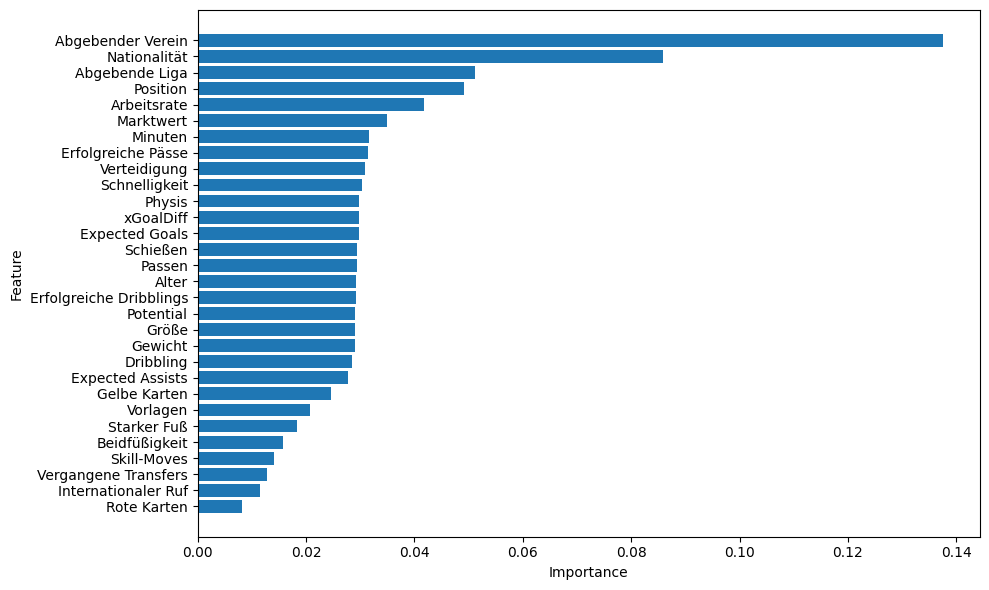

In [43]:
original_feature_importances = {}
for original_feature in categorical_cols:
    matching_columns = [col for col in X_encoded.columns if col.startswith(original_feature)]
    total_importance = sum(best_model.feature_importances_[X.columns.get_loc(col)] for col in matching_columns)
    original_feature_importances[original_feature] = total_importance

for numerical_feature in X.drop(columns=X_encoded.columns, axis=1).columns:
    original_feature_importances[numerical_feature] = best_model.feature_importances_[X.columns.get_loc(numerical_feature)]

importance_df = pd.DataFrame({
    'Feature': list(original_feature_importances.keys()),
    'Importance': list(original_feature_importances.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_randomforest.png', bbox_inches='tight')
plt.show()

In [44]:
def show_correct_predictions(transfers, y_test, y_pred):
    correct_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == pred]
    correct_players = transfers.iloc[correct_indices]
    high_value_players = correct_players[correct_players['Marktwert'] >= 10]
    return high_value_players.sample(10)

correct_predictions = show_correct_predictions(transfers, y_test, rf_y_pred)
print(correct_predictions)

     Saison               Spieler            Position  Alter  Marktwert  \
534      19  Jean-Philippe Gbamin  Defensive Midfield     23       28.0   
519      19        Alexis Sánchez      Centre-Forward     30       35.0   
506      19             Joelinton    Central Midfield     22       35.0   
35       18    Jannik Vestergaard         Centre-Back     25       14.0   
84       18            Salif Sané         Centre-Back     27       18.0   
498      19          Paco Alcácer      Centre-Forward     26       42.0   
545      19      Valentino Lazaro       Left Midfield     23       17.0   
167      18        Sandro Ramírez      Centre-Forward     23       10.0   
44       18      Lautaro Martínez      Centre-Forward     20       25.0   
66       18           Lucas Digne           Left-Back     25       15.0   

      Nationalität Abgebender Verein  Abgebende Liga Aufnehmender Verein  \
534  Cote d'Ivoire    1.FSV Mainz 05      Bundesliga             Everton   
519          Chile    

Support-Vektor-Machine-Modell

In [133]:
y_counts = transfers['Aufnehmender Verein'].value_counts()
valid_clubs = y_counts[y_counts > 1].index
transfers = transfers[transfers['Aufnehmender Verein'].isin(valid_clubs)]

X = transfers.drop(['Aufnehmender Verein','Aufnehmende Liga','Spieler','Saison','Tore'], axis=1)
y = transfers['Aufnehmender Verein']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

y_le = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.2, random_state=42)

class_counts = pd.Series(y_train).value_counts()
target_sampling = {class_label: int(count * 1.5) for class_label, count in class_counts.items()}

oversampler = RandomOverSampler(sampling_strategy=target_sampling, random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_

svm_y_pred = best_svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nSVM Classification Report:\n", svm_report)

cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Best Model Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.0988

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.29      0.24         7
           1       0.00      0.00      0.00         1
           2       0.11      0.20      0.14         5
           3       0.00      0.00      0.00         7
           4       0.25      0.25      0.25         4
           5       0.20      0.14      0.17         7
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.12      0.08      0.10        13
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         8
          15  

XGBoost Modell

In [135]:
X = transfers.drop(['Aufnehmender Verein','Aufnehmende Liga','Spieler','Saison','Tore'], axis=1)
y = transfers['Aufnehmender Verein']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

y_le = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.2, random_state=42)

class_counts = pd.Series(y_train).value_counts()
target_sampling = {class_label: int(count * 1.5) for class_label, count in class_counts.items()}

oversampler = RandomOverSampler(sampling_strategy=target_sampling, random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

xgb_y_pred = best_xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("\nXGBoost Classification Report:\n", xgb_report)

cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Best Model Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
XGBoost Accuracy: 0.0406

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.14      0.07         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.40      0.29      0.33         7
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          10       0.16      0.23      0.19        13
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
     